# POIs in Vienna

In this notebook we show the results of the data collection of:

* the location of POIs of different categories in Vienna

The notebook calls wrap functions from the script "src/data/download_pois_networks.py".

## Imports

In [9]:
import pandas as pd
import numpy as np
import os
import sys
import pickle
import matplotlib.pyplot as plt

sys.path.append('../src/data')
from download_pois_networks import download_POIs
from download_pois_networks import download_street_network, networks_to_gdf, analyze_street_network

In [10]:
EQUAL_AREA_PROJ = '+proj=cea'
LON_LAT_PROJ = 'EPSG:4326'
MERCATOR_PROJ = 'epsg:3395'

## Read data

In [3]:
raw_data_path = '../data/raw/'
os.listdir(raw_data_path)

['ViennaAustria_r8_travel_times_old.pkl',
 'ViennaAustria_r8_nearest_loc_old.pkl',
 'ViennaAustria.pkl',
 'ViennaAustria_r8_travel_times.pkl',
 'ViennaAustria_networks.pkl',
 'ViennaAustria_r8_nearest_loc.pkl',
 'ViennaAustria_r8_hex_grid.pkl']

In [6]:
with open(f'{raw_data_path}ViennaAustria.pkl','rb') as f:
    gdf_pois = pickle.load(f)

print(gdf_pois.shape)
display(gdf_pois.head(1))

(2795, 282)


,,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,atm,brand,brand:wikidata,brand:wikipedia,name,...,etymology:wikidata,construction_year,healthcare,emergency,healthcare:speciality,military,health_specialty,smoking,smoking:outside,reg_name
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
node,15079903,Wien,AT,180,1140,Hütteldorfer Straße,yes,Eurospar,Q12309283,da:Eurospar,Eurospar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization

In [17]:
tags = {'shop':['supermarket']}

boundary, pois = download_POIs(place_name="Vienna, Austria",tags=tags)

Total POIs: 2795
Found 1046 shop-supermarket


In [18]:
filtered_pois_by_tag = {}
for tag_key, tag_values in tags.items():
    for tag_value in tag_values:
        tag_name = f"{tag_key}_{tag_value}"
        # Filter POIs that match this tag
        mask = pois[tag_key] == tag_value
        if mask.any():
            filtered_pois_by_tag[tag_name] = pois[mask]

print(len(filtered_pois_by_tag))

1


In [19]:
filtered_pois_by_tag['shop_supermarket'].head(1)

,,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,atm,brand,brand:wikidata,brand:wikipedia,name,...,etymology:wikidata,construction_year,healthcare,emergency,healthcare:speciality,military,health_specialty,smoking,smoking:outside,reg_name
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
node,15079903,Wien,AT,180,1140,Hütteldorfer Straße,yes,Eurospar,Q12309283,da:Eurospar,Eurospar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


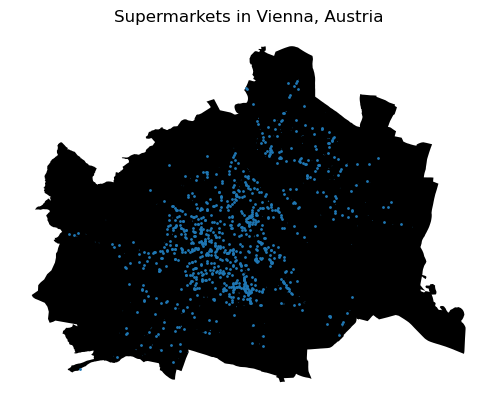

In [26]:
fig,ax = plt.subplots()
gdf_boundary_plot = boundary.to_crs(MERCATOR_PROJ)
gdf_boundary_plot.plot(ax=ax,color='k')
gdf_plot = filtered_pois_by_tag['shop_supermarket'].to_crs(MERCATOR_PROJ)
gdf_plot.plot(ax=ax,markersize=1)
ax.set_title('Supermarkets in Vienna, Austria')
ax.set_axis_off()